In [53]:
# %pip install tensorflow


In [54]:
import numpy as np
from PIL import Image

In [55]:
image = Image.open("images.jpg")
image = image.resize((256,256))

image_array = np.array(image)

In [56]:
image_array

array([[[233, 236, 243],
        [233, 236, 243],
        [233, 236, 243],
        ...,
        [231, 238, 246],
        [231, 238, 246],
        [231, 238, 246]],

       [[233, 236, 243],
        [233, 236, 243],
        [233, 236, 243],
        ...,
        [231, 238, 246],
        [231, 238, 246],
        [231, 238, 246]],

       [[233, 236, 243],
        [233, 236, 243],
        [233, 236, 243],
        ...,
        [231, 238, 246],
        [231, 238, 246],
        [231, 238, 246]],

       ...,

       [[247, 248, 253],
        [247, 248, 253],
        [247, 248, 253],
        ...,
        [247, 250, 255],
        [247, 250, 255],
        [247, 250, 255]],

       [[247, 248, 253],
        [247, 248, 253],
        [247, 248, 253],
        ...,
        [247, 250, 255],
        [247, 250, 255],
        [247, 250, 255]],

       [[247, 248, 253],
        [247, 248, 253],
        [247, 248, 253],
        ...,
        [247, 250, 255],
        [247, 250, 255],
        [247, 250, 255]]

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

# Example: input image shape = 128x128 with 3 color channels (RGB)
model = Sequential([
    # 1st Convolutional layer
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(256 , 256 , 3)),
    
    # MaxPooling layer
    MaxPooling2D(pool_size=(2,2)),
    
    # 2nd Convolutional layer
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    
    # Flatten layer
    Flatten()
])

model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1000000)        │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,392 (75.75 KB)

 Trainable params: 19,392 (75.75 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Add batch dimension
image_array = np.expand_dims(image_array, axis=0)  
features = model.predict(image_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


In [59]:
import matplotlib.pyplot as plt

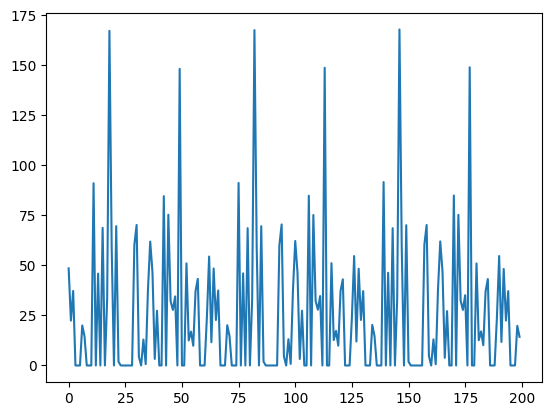

In [60]:
plt.plot(features[0][:200])

In [67]:
non_zero_features = [int(i) for i in features[0] if i != 0]

In [69]:
type(non_zero_features[0])

int

In [71]:
key_string = "".join([str(i) for i in non_zero_features])

In [73]:
len(key_string)

1106398